**Chapter 2 监督学习**
- date: 2024-06-19
- author: Rui Zhu

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mglearn

---
# 笔记
- 监督学习: 从给定的输入输出对中学习到方法, 再从另外输入中预测输出; 其主要有‘分类’和‘回归’两类问题
- 无监督学习: 只有输入数据是已知的, 没有为算法提供输出数据
- 泛化: 如果一个模型能够对没见过的数据作出准确预测, 则说该模型能够从训练集泛化到测试集
- 过拟合和欠拟合:
    1. 过拟合: 如果一个模型过分关注训练集的细节, 则会在训练集上表现很好, 但不能泛化到新数据上, 称其过拟合
    2. 欠拟合: 如果一个模型没有抓住数据的全部内容, 在训练集上表现都不好, 称其欠拟合
    3. 训练集和测试集之间的性能差异很小, 可能存在欠拟合; 差距很大, 可能存在过拟合
- 训练集越大(数据点变化范围越大), 在不发生过拟合的前提下, 可以使用的模型越复杂, 泛化能里越强
- 特征数量较少的数据集称为低维数据集; 反之称为高维数据集
- 低维数据集的方便可视化, 但是低维数据集得到的结论可能不适用于高维数据集
- 交互项: 由原始特征组合出来的特征, 也称导出特征
- 特征工程: 制作导出特征的方法

---
# 一些样本数据集

## 模拟的二分类数据集forge

X.shape: (26, 2)


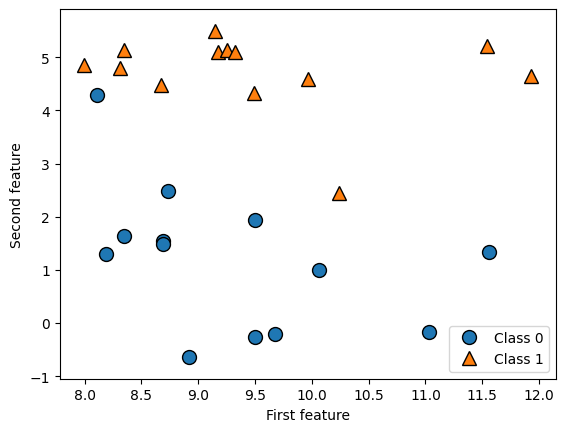

In [2]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

## 模拟的回归算法数据集wave

Text(0, 0.5, 'Target')

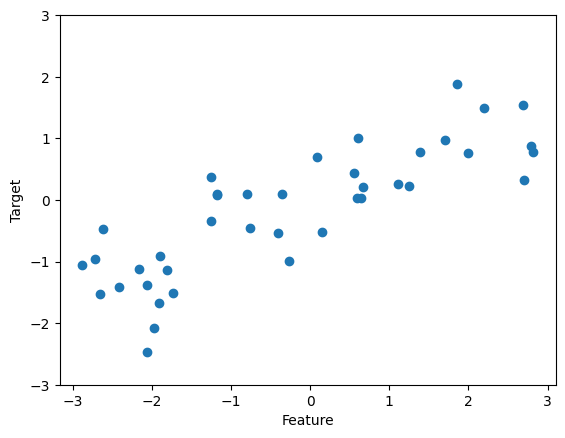

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

## 威斯康星州乳腺癌数据集cancer

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


## 波士顿房价数据集boston
* v1.2之后不可使用该数据集
* 手动下载: https://lib.stat.cmu.edu/datasets/

In [5]:
"""
原始数据集
"""
path = Path("./data/boston.txt")
raw_df = pd.read_csv(path, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print("data.shape: {}".format(data.shape))

data.shape: (506, 13)


In [6]:
"""
包含交互项的数据集
"""
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


---
# k近邻 (k-NN)

## 算法介绍
* k-NN算法是最简单的机器学习算法, 构建模型只需保存训练数据, 可以分类也可以回归
* 算法: 
    1. 在特征空间中, 找到预测点的k个最近邻(k=1, 2, 3, ...), 从这k个最近邻得到预测结果.
    2. 对于分类问题, 采用投票法, 预测结果服从多数
    3. 对于回归问题, 预测结果为邻居们的平均值
    4. k近邻分类器有2个重要参数: 邻居个数, 数据点之间的距离度量方法
    5. 实践中, 邻居个数3-5个往往得到比较好的结果; 距离度量方法默认使用欧式距离
* 优点:
    1. 容易理解
    2. 不用过多的调参
    3. 很容易快速构建, 是很好的基准方法
* 缺点:
    1. 需要对数据做较好的预处理
    2. 训练集特征数很多(多于几百)或者样本量很大, 预测速度会比较慢
    3. 对于大多数特征的大多数取值为0的数据集(稀疏数据集), 表现不好
* web
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#kneighborsclassifier
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#kneighborsregressor

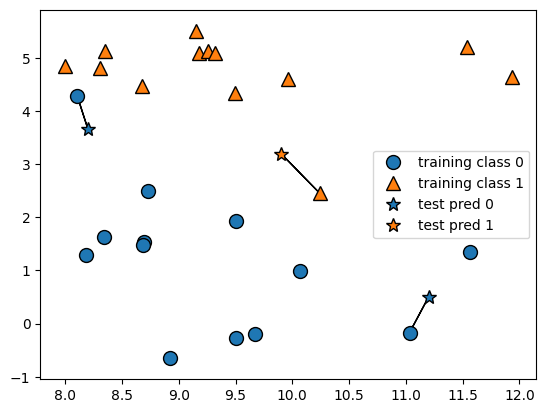

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

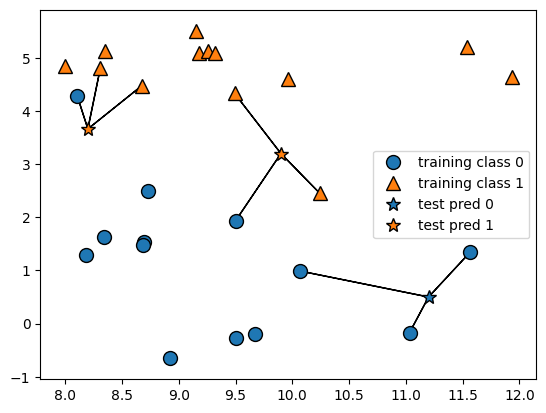

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

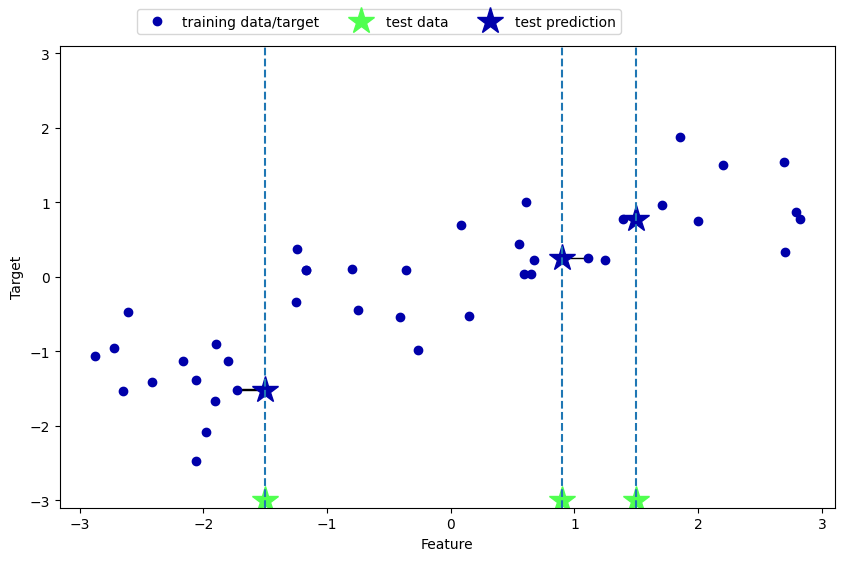

In [9]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

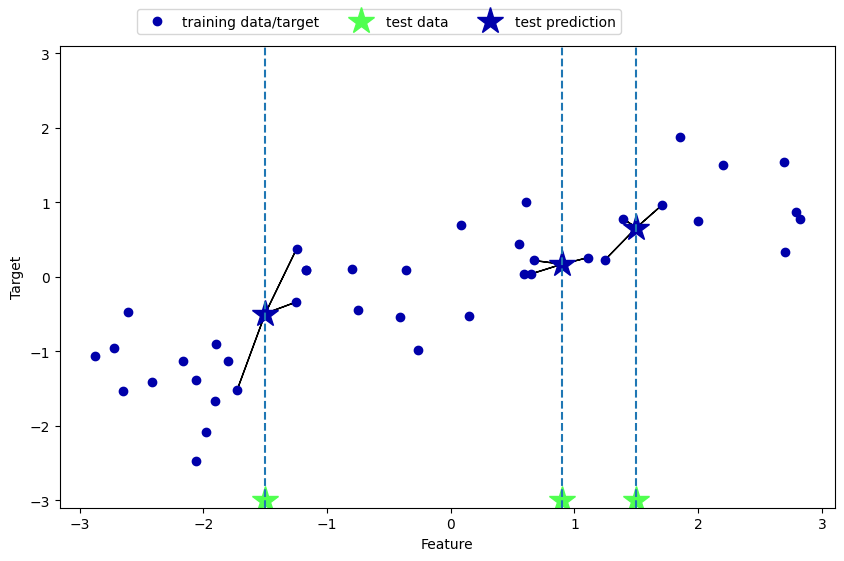

In [10]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

## k近邻分类

In [11]:
"""
使用模拟数据集forge
"""
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# load the data
X, y = mglearn.datasets.make_forge()

# split the data with 75% in training and 25% in test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
clf = KNeighborsClassifier(n_neighbors=3)

# fit the model using the training data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Test set predictions: {y_pred}")
print(f"Test set accuracy: {clf.score(X_test, y_test):.2f}")

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


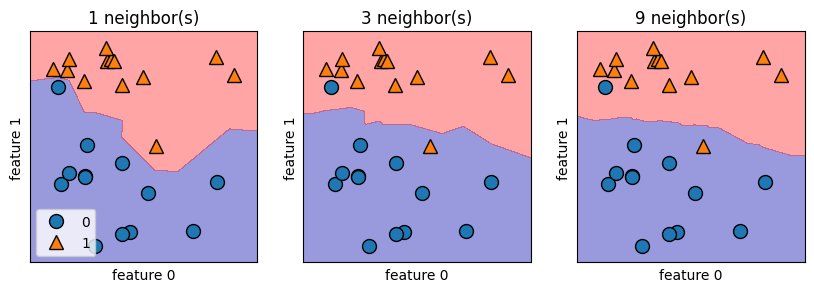

In [12]:
"""
绘制决策边界

分析:
* 邻居数量越多, 决策边界越平滑, 更平滑的边界对应更简单的模型, 模型复杂度越低
"""
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

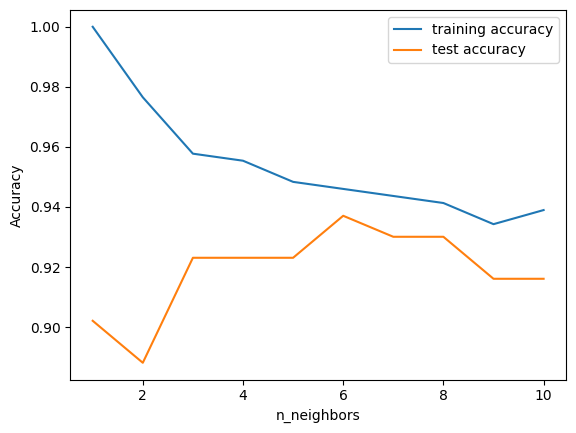

In [13]:
"""
使用真实数据集

分析:
* 邻居数量过少时, 模型复杂度高, 容易过拟合, 因此训练集上的准确率很高, 但测试集上的准确率很低
* 邻居数量过多时, 模型复杂度低, 容易欠拟合, 因此训练集和测试集上的准确率都很低
* 即便如此, 最差的性能也有88%的准确率
"""

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target,  # 确保训练集和测试集中的类别比例与原始数据集中的类别比例相同
                                                    random_state=66)

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## k近邻回归

In [14]:
"""
使用wave数据集
"""
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(f"Test set predictions:\n{y_pred}")
print(f"Test set R^2: {reg.score(X_test, y_test):.2f}")  # 对于回归问题, score返回的是R^2.值为1表示完美拟合

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


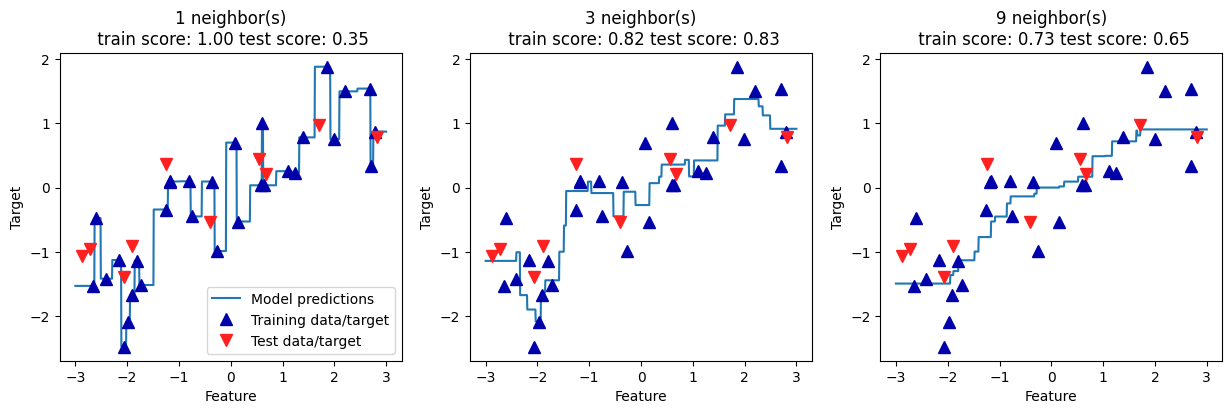

In [15]:
"""
不同邻居数量的KNeighborsRegressor的预测结果
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)  # 将一个一维数组转换为一个n行1列的二维数组

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(f"{n_neighbors} neighbor(s)\n train score: {reg.score(X_train, y_train):.2f} test score: {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

---
# 线性模型(回归)
* 优势: 
    1. 线性模型的训练速度非常快, 预测速度也很快, 并且可以推广到非常大的数据集, 对稀疏数据也很有效
    2. 易于理解和解释; 但如果数据集中包含高度相关的特征时, 可能很难对数据进行解释
    3. 特征数量大于样本数量时, 线性模型的表现通常都很好
* 注意LogisticRegression分类算法和岭回归, 有solver='sag'选项可以加速处理大型数据

## 线性回归
* 又称普通最小二乘法(ordinary least squares, OLS)
* 算法: 预测是特征的加权求和, 寻找模型参数w(数组)和b(浮点数), 通过计算均方误差, 找到使得均方误差最小的模型参数
* 均方误差(mean square error): 预测值和真实值之差的平方和除以样本数
* 最小二乘法没有超参数, 因此无法控制模型复杂度
* 缺点: 无法控制模型复杂度, 低维数据容易欠拟合, 高维数据容易过拟合

### 一维数据集上的表现
* 由于只有一个特征, 模型复杂度非常低, 过拟合的风险很低, 很容易欠拟合
* 而对于高维数据集, 线性模型将变得更加强大, 过拟合的风险也变大

In [16]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print(f"lr.coef_: {lr.coef_}")  # 斜率
print(f"lr.intercept_: {lr.intercept_}") # 截距
# * sklearn中学到的参数都带下划线, 为了跟用户设置的参数区分开

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675976


In [17]:
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")
# * 训练集和测试集上的分数接近, 说明可能存在欠拟合

Training set score: 0.67
Test set score: 0.66


### 多维数据集上的表现

In [18]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")
# * 训练集上的分数远高于测试集上的分数, 说明可能存在过拟合

Training set score: 0.95
Test set score: 0.61


## 岭回归 (Ridge regression)
* 介绍: 为解决OLS方法在高维数据中容易过拟合的问题, 在OLS的目标函数的基础上, 使用L2正则化作为惩罚项
* 优势: 
    1. 对OLS做显式约束, 避免过拟合
    2. 通过alpha参数, 调节模型复杂度, 调节模型的泛化能力
* alpha参数:
    1. alpha用于指定正则化的强度, 数值等于0时为不约束, 相当于OLS
    2. alpha越大, 会得到更小的拟合系数

In [19]:
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ridge = Ridge().fit(X_train, y_train)

print(f"Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge.score(X_test, y_test):.2f}")

Training set score: 0.89
Test set score: 0.75


In [20]:
"""
不同alpha值对模型泛化能力的影响
"""
for alpha in [0, 0.1, 1, 10]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    print(f"alpha = {alpha} | "
          f"training set score: {ridge.score(X_train, y_train):.2f} | "
          f"test set score: {ridge.score(X_test, y_test):.2f}")


alpha = 0 | training set score: 0.95 | test set score: 0.60
alpha = 0.1 | training set score: 0.93 | test set score: 0.77
alpha = 1 | training set score: 0.89 | test set score: 0.75
alpha = 10 | training set score: 0.79 | test set score: 0.64


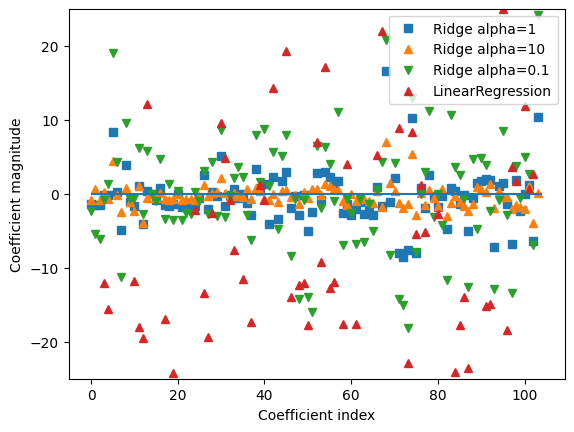

In [21]:
"""
更大的alpha表示更强的约束, 得到的模型系数更小
"""

ridge = Ridge(alpha=1).fit(X_train, y_train)
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

lr = LinearRegression().fit(X_train, y_train)
plt.plot(lr.coef_, '^', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

### 学习曲线
* 在数据量逐渐增加的子数据集上对模型进行评估
* 下图为波士顿房价训练集的线性回归和岭回归的学习曲线, 有以下结论:
    1. 对于全部数据集大小, 训练分数高于测试分数
    2. 岭回归的训练分数低于线性回归, 因为岭回归是正则化的
    3. 岭回归的测试分数更高, 特别是在训练集样本量小于400时, 线性回归学不到任何
    4. 训练集样本量增大, 两个模型的测试分数均升高, 最终线性回归将与岭回归具有相同的性能

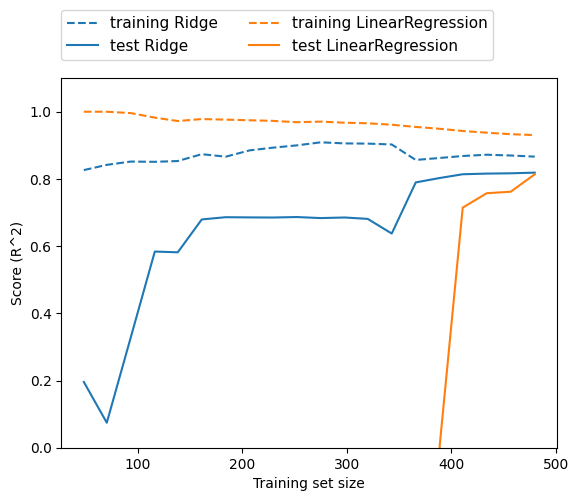

In [22]:
mglearn.plots.plot_ridge_n_samples()  # 这段代码要跑2min

## lasso
* 与岭回归的区别是使用了L1正则化
* L1正则化的结果是: 某些系数刚好为0, 即某些特征被模型忽略, 即模型自动完成了特征选择
* lasso的正则化强度参数alpha:
    1. alpha控制模型系数趋近于0的强度
    2. 默认值是1
    3. alpha设置太大容易欠拟合, 使用的特征数量很少
    4. alpha设置太小会过拟合, 使用全部特征, 测试分数很接近OLS
* 实践中, 一般首选岭回归; 除非特征很多, 认为其中几个是重要的
* sklearn还提供的Lasso和Ridge的组合: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html), 结合了两者的惩罚项; 代价是需要调节两个参数, 分别用于L1和L2的正则化

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=100000).fit(X_train, y_train)  # max_iter: 最大迭代次数
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")  # 只使用了4个特征

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [43]:
"""
alpha设置恰当才会有较好的泛化能力
"""
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)  # max_iter: 最大迭代次数
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


In [44]:
"""
alpha设置过小, 模型很复杂, 容易过拟合, 结果接近OLS
"""
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)  # max_iter: 最大迭代次数
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

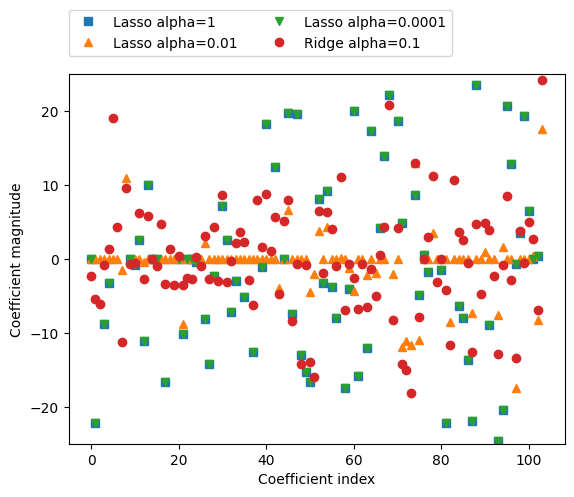

In [45]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

---
# 线性模型(分类)
* 最常见的线性分类算法: Logistic回归和线性支持向量机(liner support vector machine, 线性SVM)
* LogisticRegression和linerSVM的正则化强度参数C: C值越大, 正则化越弱

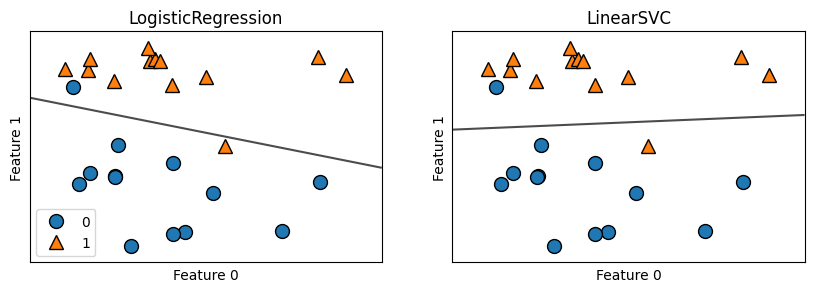

In [46]:
"""
在forge数据集上可视化LogisticRegression和LinearSVC的决策边界
"""
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LogisticRegression(), LinearSVC()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{clf.__class__.__name__}")
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

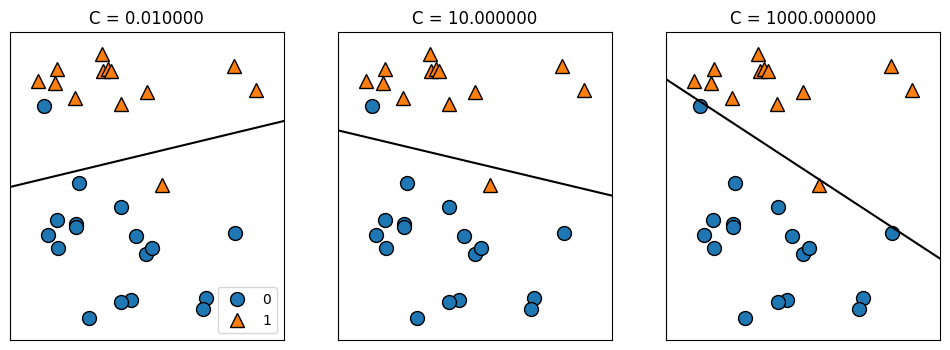

In [48]:
"""
C值越小, 正则化越强, 模型会选择一条相对水平的线
"""
mglearn.plots.plot_linear_svc_regularization()

### 多维数据集上的LogisticRegression实战

In [62]:
"""
多维数据集上的LogisticRegression实战
"""
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)  # 默认C=1
print(f"Training set score: {logreg.score(X_train, y_train):.2f}")
print(f"Test set score: {logreg.score(X_test, y_test):.2f}")  # 欠拟合

Training set score: 0.96
Test set score: 0.96


In [63]:
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
print(f"Training set score: {logreg100.score(X_train, y_train):.2f}")
print(f"Test set score: {logreg100.score(X_test, y_test):.2f}")  # 更复杂的模型可能表现更好

Training set score: 0.98
Test set score: 0.97


In [64]:
logreg001 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)  # 降低C值, 增强正则化, 模型复杂度降低, 欠拟合
print(f"Training set score: {logreg001.score(X_train, y_train):.2f}")
print(f"Test set score: {logreg001.score(X_test, y_test):.2f}")

Training set score: 0.95
Test set score: 0.95


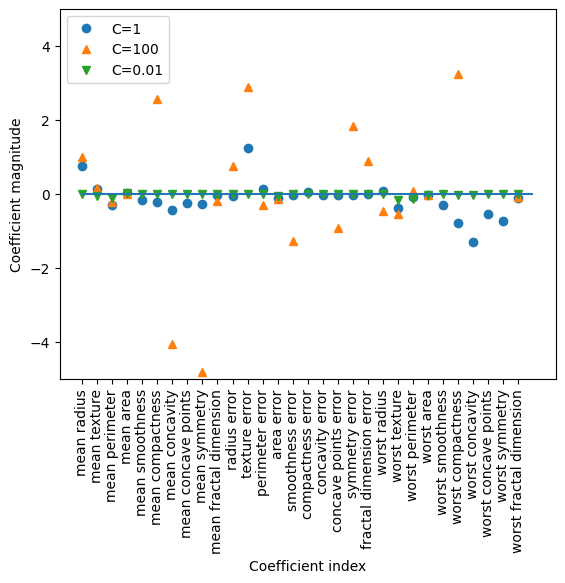

In [65]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [68]:
"""
与线性模型的回归算法类似, 有表示正则化强度的参数C;
此外还有惩罚项选择参数penalty, 可以选择l1或l2, 不同的正则化方案选择, 也会影响使用全部特征还是部分特征
"""
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear", max_iter=10000).fit(X_train, y_train)
    print(f"Training accuracy of l1 logreg with C={C}: {lr_l1.score(X_train, y_train):.2f}")
    print(f"Test accuracy of l1 logreg with C={C}: {lr_l1.score(X_test, y_test):.2f}")

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1: 0.96
Test accuracy of l1 logreg with C=1: 0.96
Training accuracy of l1 logreg with C=100: 0.99
Test accuracy of l1 logreg with C=100: 0.98


### 多分类
* 将二分类推广到多分类的常见方法是“一对其余”

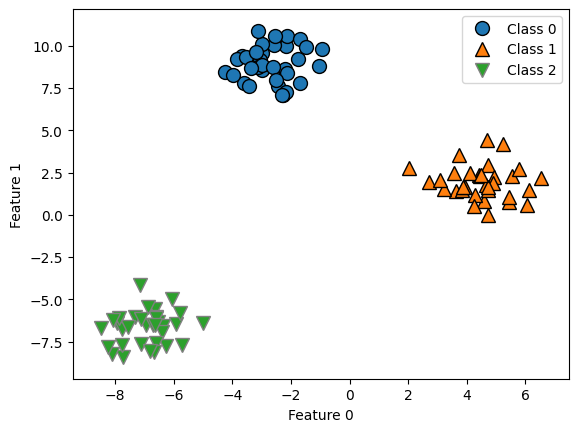

In [73]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)  # 创建一个3分类数据集
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [74]:
liner_svm = LinearSVC().fit(X, y)
print(f"Coefficient shape: {liner_svm.coef_.shape}")
print(f"Intercept shape: {liner_svm.intercept_.shape}")

Coefficient shape: (3, 2)
Intercept shape: (3,)


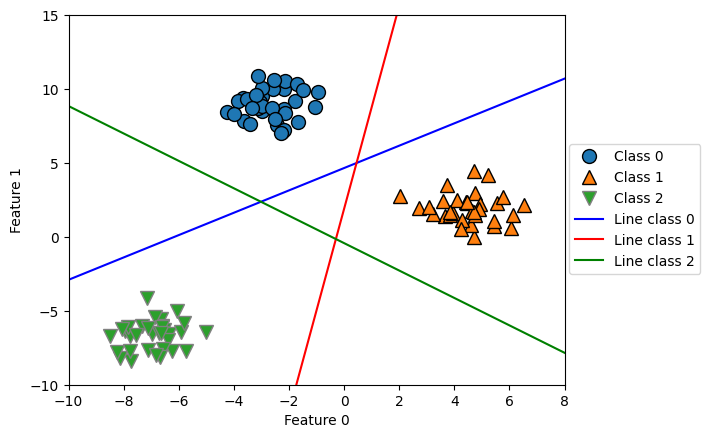

In [76]:
"""
可视化分类器的决策边界
"""
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(liner_svm.coef_, liner_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

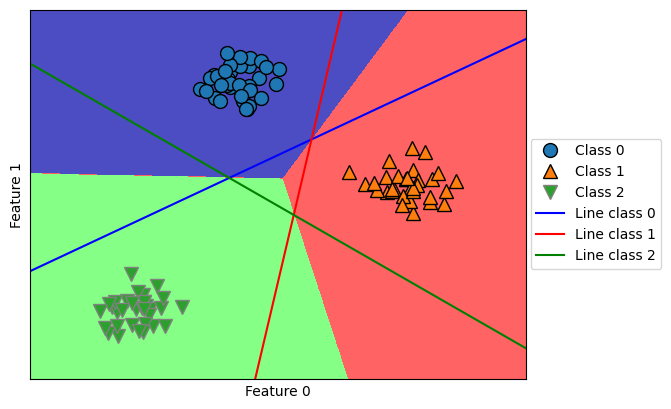

In [77]:
"""
可视化预测结果
"""
mglearn.plots.plot_2d_classification(liner_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(liner_svm.coef_, liner_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

---
# 朴素贝叶斯分类器